In [3]:
import torch, onnxruntime as ort, torch.utils._pytree as p
from optimum.exporters.onnx import main_export
print("torch:", torch.__version__, "cuda:", torch.version.cuda)
print("pytree.register:", hasattr(p, "register_pytree_node"))
print("onnxruntime device:", ort.get_device())
print("optimum main_export OK")

c:\Users\Taeyong_Sim\anaconda3\envs\stable_diffusion\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch: 2.2.2+cu121 cuda: 12.1
pytree.register: True
onnxruntime device: GPU
optimum main_export OK


c:\Users\Taeyong_Sim\anaconda3\envs\stable_diffusion\lib\site-packages\torch\onnx\_internal\registration.py:167: OnnxExporterWarning: Symbolic function 'aten::scaled_dot_product_attention' already registered for opset 14. Replacing the existing function with new function. This is unexpected. Please report it on https://github.com/pytorch/pytorch/issues.
  warnings.warn(


In [ ]:
import onnxruntime as ort
from optimum.onnxruntime import ORTStableDiffusionImg2ImgPipeline
from diffusers.utils import load_image
import torchvision.transforms as transforms

print(ort.get_device())

model_id ="stabilityai/sd-turbo"
pipeline = ORTStableDiffusionImg2ImgPipeline.from_pretrained(
    model_id,
    dtype="fp16",            # FP16은 GPU provider에서만
    use_io_binding=True,
    export=True,
    provider="CUDAExecutionProvider"  # 꼭 지정
)

GPU


Keyword arguments {'subfolder': '', 'trust_remote_code': False} are not expected by StableDiffusionPipeline and will be ignored.
Loading pipeline components...: 100%|██████████| 5/5 [00:00<00:00,  5.33it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .
c:\Users\Taeyong_Sim\anaconda3\envs\stable_diffusion\lib\site-packages\transformers\models\clip\modeling_clip.py:236: TracerWarning: Converti

In [ ]:
to_tensor = transforms.ToTensor()
to_image = transforms.ToPILImage()

url = "https://cndreams.com/dir_attach/img_news/news_img1_1559662767.jpg"
d_image = load_image(url).resize((512, 512)) # 입력 크기 조절 가능
d_prompt = "best quailty, hyper detail, realistic" + ", " + 'house, tree'
d_image = to_tensor(d_image)

In [ ]:
image = pipeline(
    prompt=d_prompt,
    image=d_image,
    num_inference_steps=4,   # 1~4 권장
    strength=0.5,            # 구조를 꽤 따르되 디테일 갱신
    guidance_scale=0.0
).images[0]

c:\Users\Taeyong_Sim\anaconda3\envs\stable_diffusion\lib\site-packages\diffusers\configuration_utils.py:141: FutureWarning: Accessing config attribute `num_hidden_layers` directly via 'ORTTextEncoder' object attribute is deprecated. Please access 'num_hidden_layers' over 'ORTTextEncoder's config object instead, e.g. 'scheduler.config.num_hidden_layers'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)
100%|██████████| 2/2 [00:02<00:00,  1.31s/it]


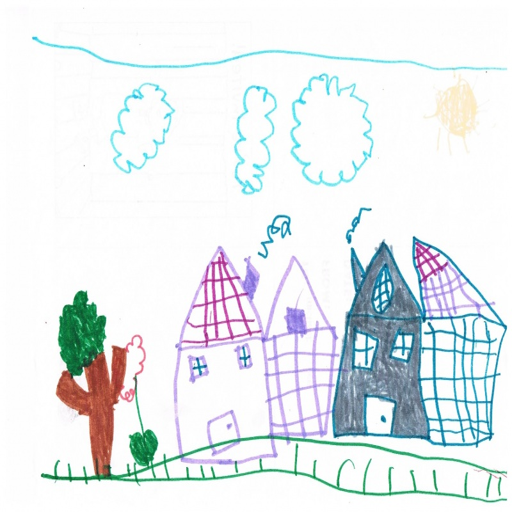

In [16]:
to_image(d_image)

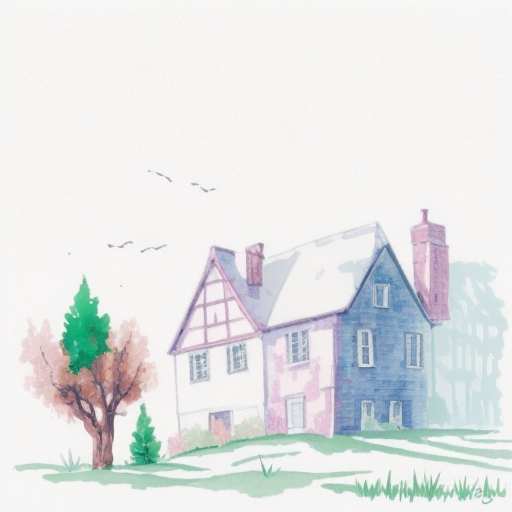

In [14]:
image

In [17]:
pipeline.save_pretrained("./onnx")